In [5]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# px.set_mapbox_access_token(open("mapbox_token").read())

https://www.notion.so/Conceitos-fundamentais-de-Machine-Learning-e-Inteligencia-artificial-6ca2615ecd7540f79d95baea989708ad#eb57323182cb438982a348c2f0de4429

In [2]:
df = pd.read_csv("sao-paulo-properties-april-2019.csv")

In [3]:
df_rent = df[df["Negotiation Type"]=="rent"]
df_sale = [df["Negotiation Type"]=="sale"]

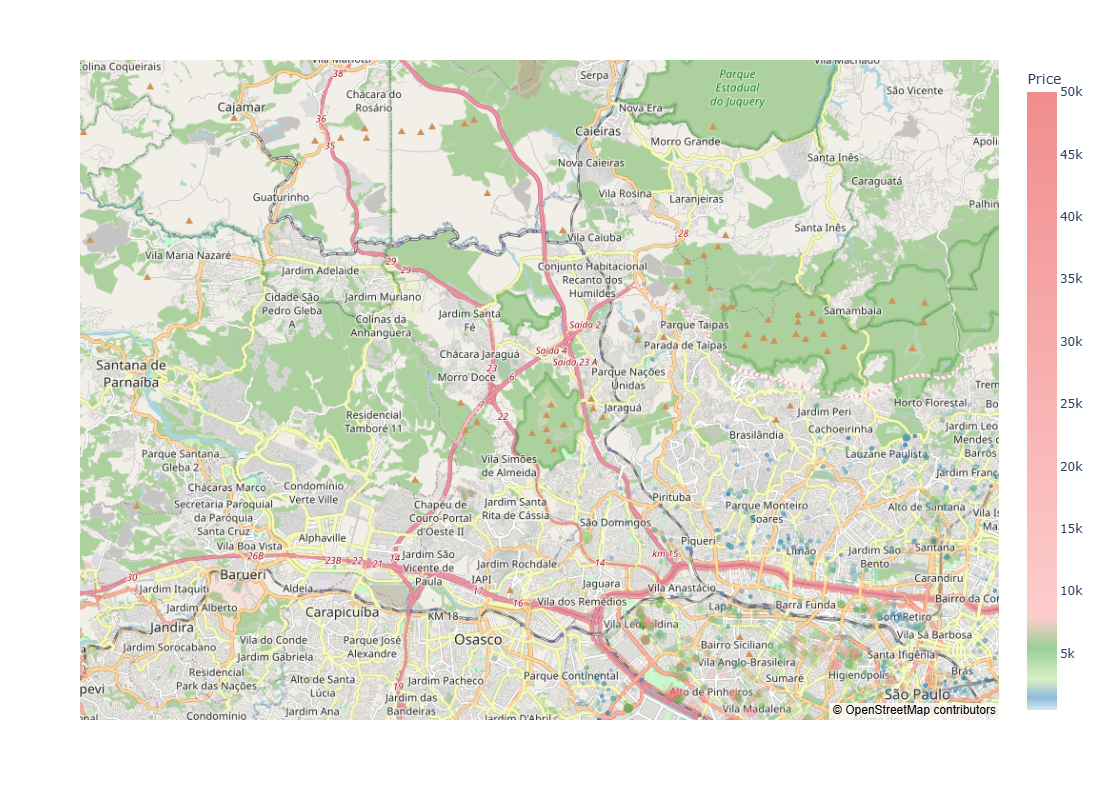

In [6]:
fig = px.scatter_mapbox(
    df_rent,
    lat="Latitude",
    lon="Longitude",
    color="Price",
    size="Size",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=10,
    opacity=0.4
)

# Atualizando cores
fig.update_coloraxes(
    colorscale=[
        [0, 'rgba(166,206,227, 0.5)'],
        [0.02, 'rgba(31,120,180,0.5)'],
        [0.05, 'rgba(178,223,138,0.5)'],
        [0.10, 'rgba(51,160,44,0.5)'],
        [0.15, 'rgba(251,154,153,0.5)'],
        [1, 'rgba(227,26,28,0.5)']
    ]
)

# Layout sem API key
fig.update_layout(
    height=800,
    mapbox=dict(
        style="open-street-map",  # <- NÃO PRECISA DE CHAVE
        center=go.layout.mapbox.Center(lat=-23.543138, lon=-46.69486)
    )
)

fig.show()

## 3. Visualização do conjunto de dados

In [7]:
# visao geral sobre cada coluna do data frame
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7228 entries, 0 to 11209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             7228 non-null   int64  
 1   Condo             7228 non-null   int64  
 2   Size              7228 non-null   int64  
 3   Rooms             7228 non-null   int64  
 4   Toilets           7228 non-null   int64  
 5   Suites            7228 non-null   int64  
 6   Parking           7228 non-null   int64  
 7   Elevator          7228 non-null   int64  
 8   Furnished         7228 non-null   int64  
 9   Swimming Pool     7228 non-null   int64  
 10  New               7228 non-null   int64  
 11  District          7228 non-null   object 
 12  Negotiation Type  7228 non-null   object 
 13  Property Type     7228 non-null   object 
 14  Latitude          7228 non-null   float64
 15  Longitude         7228 non-null   float64
dtypes: float64(2), int64(11), object(3)
memory usa

In [8]:
df_rent.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Condo'}>,
        <Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Rooms'}>],
       [<Axes: title={'center': 'Toilets'}>,
        <Axes: title={'center': 'Suites'}>,
        <Axes: title={'center': 'Parking'}>,
        <Axes: title={'center': 'Elevator'}>],
       [<Axes: title={'center': 'Furnished'}>,
        <Axes: title={'center': 'Swimming Pool'}>,
        <Axes: title={'center': 'New'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

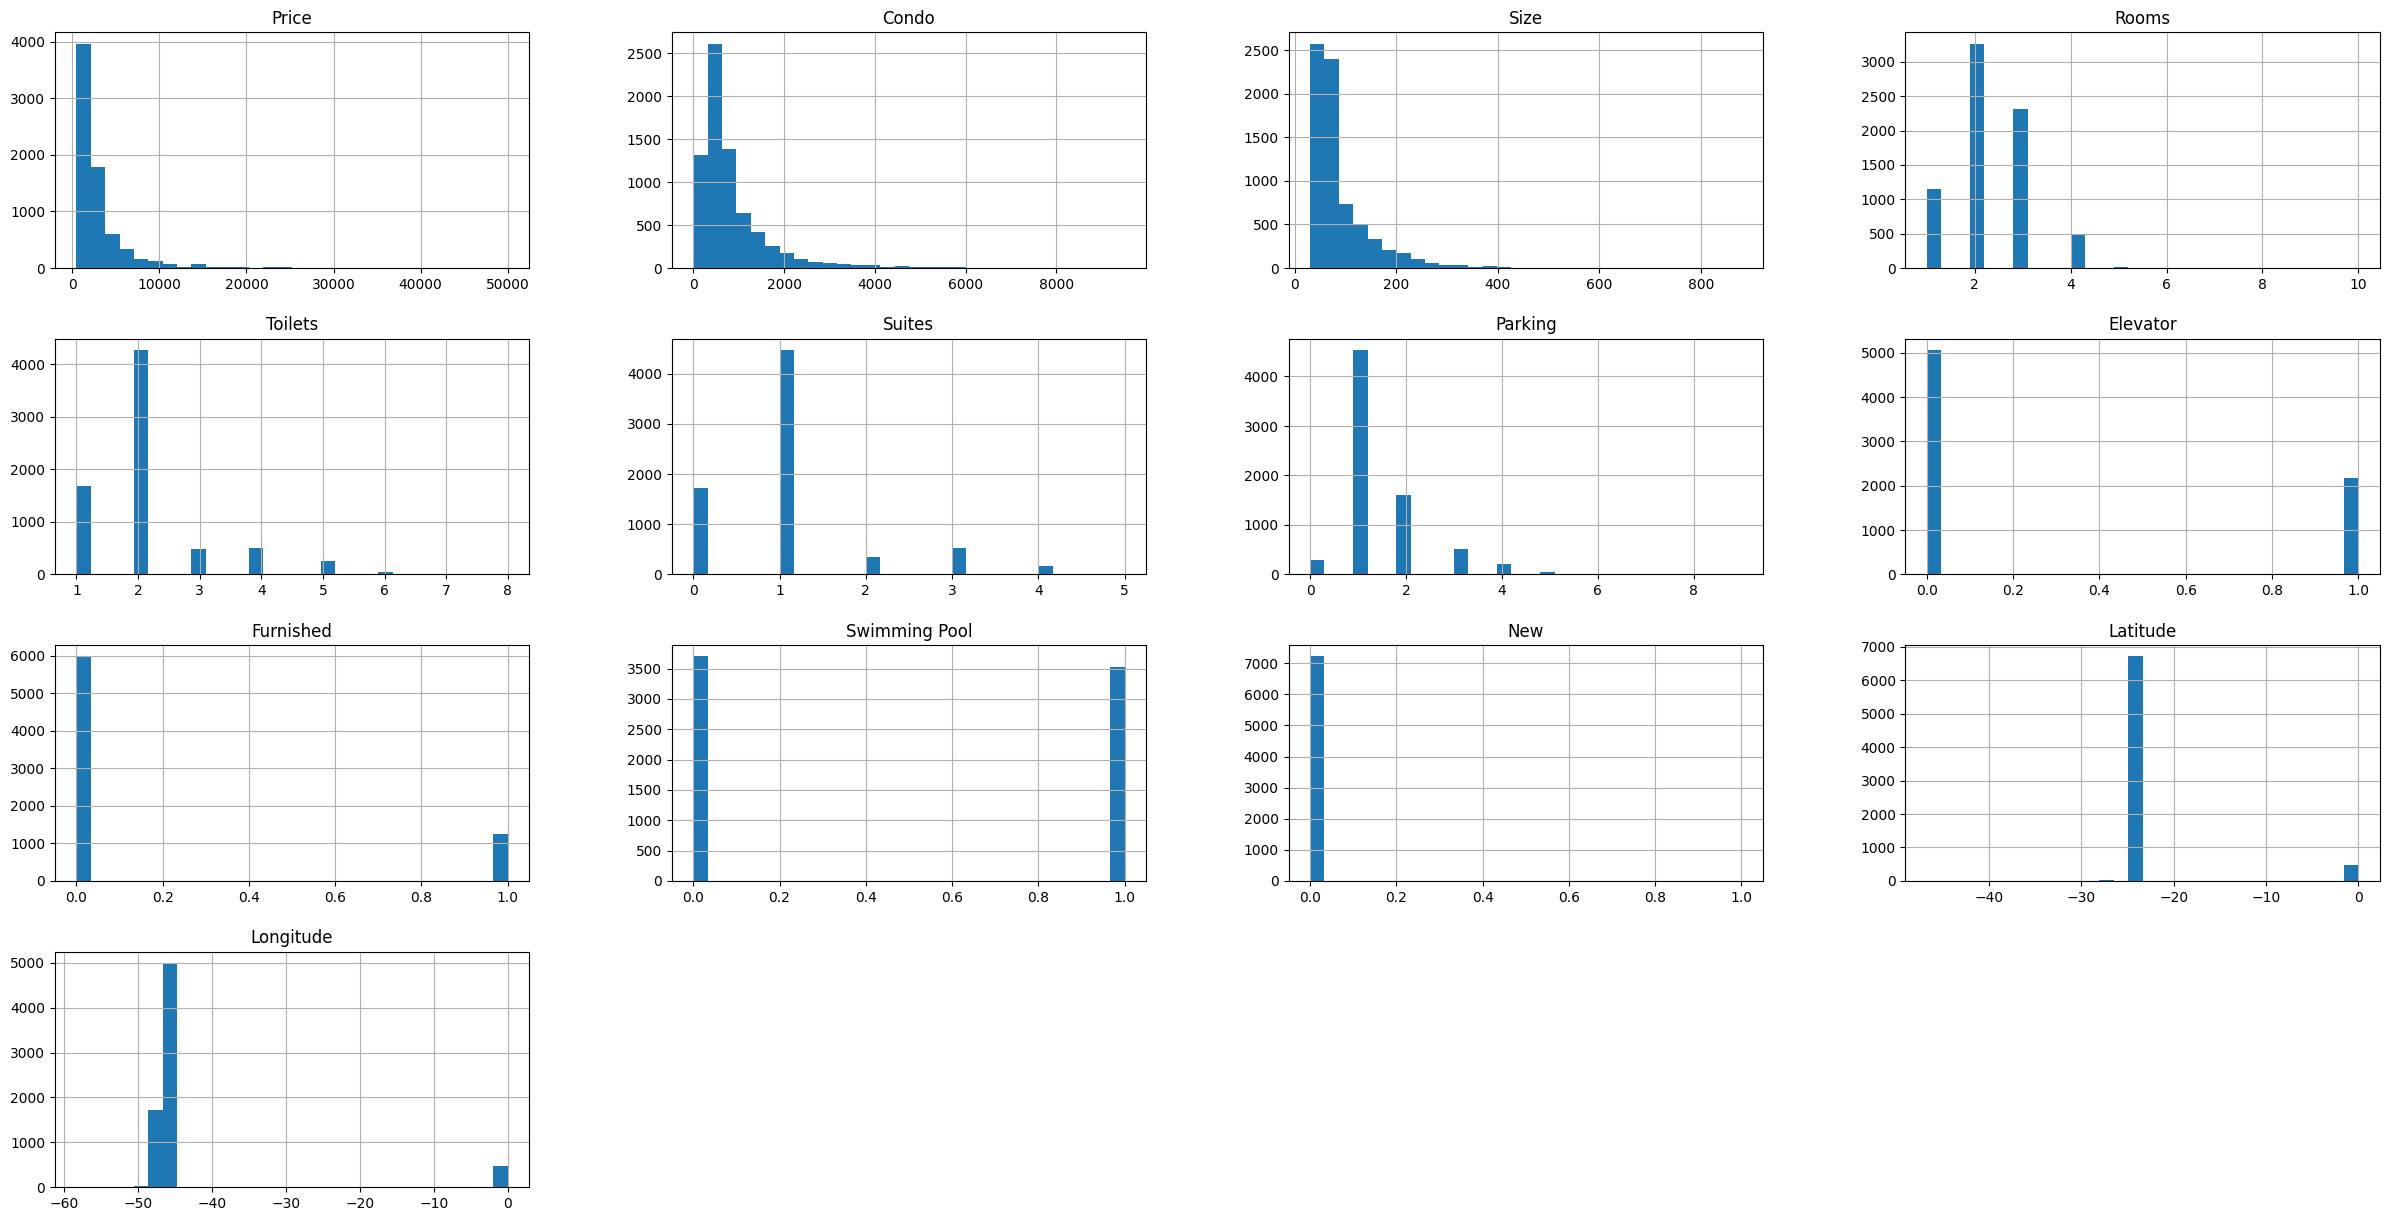

In [11]:
# historgrama de distribuicao das variaveis numericas
df_rent.hist(bins=30, figsize=(30, 15))

In [12]:
# a variaqvel Property Type nao e util no modelo
df_rent["Property Type"].value_counts()

Property Type
apartment    7228
Name: count, dtype: int64

In [17]:
df_rent["District"].value_counts()

District
Mooca/São Paulo              178
Moema/São Paulo              163
Vila Mariana/São Paulo       161
Morumbi/São Paulo            159
Cambuci/São Paulo            153
                            ... 
Lajeado/São Paulo              8
Parque do Carmo/São Paulo      6
Guaianazes/São Paulo           6
Jardim São Luis/São Paulo      3
Grajaú/São Paulo               2
Name: count, Length: 94, dtype: int64

In [26]:
df_rent["Price"].astype(float)

0          930.0
1         1000.0
2         1000.0
3         1000.0
4         1300.0
          ...   
11205     3700.0
11206    21000.0
11207     3800.0
11208     5000.0
11209    15600.0
Name: Price, Length: 7228, dtype: float64

In [31]:
# analsie de correlação dos dados
df_rent.select_dtypes(include=['number']).corr()["Price"].sort_values(ascending=False)

Price            1.000000
Size             0.731795
Condo            0.700361
Parking          0.640743
Suites           0.588329
Toilets          0.583488
Rooms            0.390951
Swimming Pool    0.206884
Furnished        0.171859
Elevator         0.031860
New             -0.008477
Latitude        -0.036935
Longitude       -0.038362
Name: Price, dtype: float64

In [30]:
# df_rent.corr()["Price"].sort_values(ascending=False)

## 4. Preparação de dados para modelos de ML

### Limpeza de dados desnecessários

In [35]:
# elimina as colunas inuteis para a analise
# todos o simoveis sao apartamenteos e todos sao para alugar
df_cleaned = df_rent.drop(["New", "Property Type", "Negotiation Type"], axis=1)

In [36]:
df_cleaned.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,Artur Alvim/São Paulo,-23.525025,-46.482436


### Tratamento de dados categóricos

In [38]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# converte uma coluna categorica em uma coluna numerica
district_encoded = ordinal_encoder.fit_transform(df_cleaned[["District"]])
district_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [9.],
       [9.],
       [9.]], shape=(7228, 1))

In [39]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

# matriz esparça
housing_cat_1hot = cat_encoder.fit_transform(df_cleaned[["District"]])
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7228 stored elements and shape (7228, 94)>

In [40]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(7228, 94))

In [41]:
housing_cat_1hot.toarray().shape

(7228, 94)

In [42]:
cat_encoder.categories_

[array(['Alto de Pinheiros/São Paulo', 'Anhanguera/São Paulo',
        'Aricanduva/São Paulo', 'Artur Alvim/São Paulo',
        'Barra Funda/São Paulo', 'Bela Vista/São Paulo', 'Belém/São Paulo',
        'Bom Retiro/São Paulo', 'Brasilândia/São Paulo',
        'Brooklin/São Paulo', 'Brás/São Paulo', 'Butantã/São Paulo',
        'Cachoeirinha/São Paulo', 'Cambuci/São Paulo',
        'Campo Belo/São Paulo', 'Campo Grande/São Paulo',
        'Campo Limpo/São Paulo', 'Cangaíba/São Paulo',
        'Capão Redondo/São Paulo', 'Carrão/São Paulo',
        'Casa Verde/São Paulo', 'Cidade Ademar/São Paulo',
        'Cidade Dutra/São Paulo', 'Cidade Líder/São Paulo',
        'Cidade Tiradentes/São Paulo', 'Consolação/São Paulo',
        'Cursino/São Paulo', 'Ermelino Matarazzo/São Paulo',
        'Freguesia do Ó/São Paulo', 'Grajaú/São Paulo',
        'Guaianazes/São Paulo', 'Iguatemi/São Paulo', 'Ipiranga/São Paulo',
        'Itaim Bibi/São Paulo', 'Itaim Paulista/São Paulo',
        'Itaquera/Sã

In [44]:
one_hot = pd.get_dummies(df_cleaned["District"])


# substitui a coluna District original pelo coluna processada
df = df_cleaned.drop('District',axis = 1)
df = df.join(one_hot)
df

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1000,148,45,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1000,100,48,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1000,200,48,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1300,410,55,2,2,1,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
11206,21000,3000,208,4,4,3,3,1,1,1,...,False,False,False,False,False,False,False,False,False,False
11207,3800,710,55,1,1,0,1,0,1,1,...,False,False,False,False,False,False,False,False,False,False
11208,5000,2354,205,3,2,1,2,1,0,0,...,False,False,False,False,False,False,False,False,False,False


## 5. Selecione e treino múltiplos modelos

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
Y = df["Price"]
X = df.loc[:, df.columns != "Price"]

In [47]:
X.head()

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,Latitude,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,220,47,2,2,1,1,0,0,0,-23.543138,...,False,False,False,False,False,False,False,False,False,False
1,148,45,2,2,1,1,0,0,0,-23.550239,...,False,False,False,False,False,False,False,False,False,False
2,100,48,2,2,1,1,0,0,0,-23.542818,...,False,False,False,False,False,False,False,False,False,False
3,200,48,2,2,1,1,0,0,0,-23.547171,...,False,False,False,False,False,False,False,False,False,False
4,410,55,2,2,1,1,1,0,0,-23.525025,...,False,False,False,False,False,False,False,False,False,False


In [49]:
# separa os dados de teste e treinamento
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Regressão Linear

In [51]:
from sklearn.linear_model import LinearRegression


# vamos aplicar um modelo de regressão, para tentar prever um numero
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [52]:
some_data = X.iloc[:5]
some_labels = Y.iloc[:5]

# aplica uma previsao a um dado especifico
print("Predictions:", lin_reg.predict(some_data))
# valores que ele tentou prever
print("Labels:", list(some_labels))

Predictions: [ 850.11086406  766.07900442  840.89970819  873.65751028 1080.26833774]
Labels: [930, 1000, 1000, 1000, 1300]


In [54]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, preds)


# erro medio cometido pelo modelo
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(1990.8580412116148)

### Decision Tree Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor

# vamos aplicar um modelo de arvore de decisao, para tentar prever um numero
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [56]:
preds = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, preds)


# o erro com arvore de decisoes e3 menor por que geralemnte essse modelo tende e aprender demais
# ou seja, entra em overfiting
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(35.977756675803704)

### Avaliação mais precisa usando Cross Validation

### validação curzada das arvores de decisoes

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)


tree_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [2635.26900737 2088.97052578 1949.06470464 2486.13889173 1862.04667561
 2346.85804698 2456.78907246 2468.83793654 2918.68907365 2122.46527919]
Mean: 2333.5129213971304
Standard deviation: 310.62734196339267


### validação curzada com regressão linear

In [59]:
scores = cross_val_score(lin_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [2229.35434725 1905.2422851  1582.15554402 1966.01968993 1408.07559031
 2212.73461307 2066.97147706 2464.80738268 2340.1702938  1897.48222456]
Mean: 2007.3013447763474
Standard deviation: 312.91937025805663


### RandomForest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [61]:
preds = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train, preds)

rf_rmse = np.sqrt(rf_mse)
rf_rmse

np.float64(674.5632825677864)

In [62]:
scores = cross_val_score(rf_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rf_rmse_scores)

Scores: [2099.63686917 1610.84165727 1480.22609676 2087.94834502 1307.787479
 2080.70531327 1858.15570201 2052.05005815 2109.84597165 1555.26990124]
Mean: 1824.2467393549982
Standard deviation: 291.32988011803474


## 6. Avaliando seu modelo e otimizando-o

### Otimizando seu modelo através do GridSearch

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [65]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [66]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2260.1151925990002 {'max_features': 2, 'n_estimators': 3}
2044.877470814048 {'max_features': 2, 'n_estimators': 10}
1914.5960086906507 {'max_features': 2, 'n_estimators': 30}
2255.2452490742826 {'max_features': 4, 'n_estimators': 3}
1996.7970580089423 {'max_features': 4, 'n_estimators': 10}
1903.139777899324 {'max_features': 4, 'n_estimators': 30}
2329.933202397686 {'max_features': 6, 'n_estimators': 3}
1979.61691622765 {'max_features': 6, 'n_estimators': 10}
1928.8674114370106 {'max_features': 6, 'n_estimators': 30}
2272.0935064782198 {'max_features': 8, 'n_estimators': 3}
1966.388601169665 {'max_features': 8, 'n_estimators': 10}
1927.0451995331985 {'max_features': 8, 'n_estimators': 30}
2223.4516245595873 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1965.2853949899056 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2205.615616200292 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1971.341909482489 {'bootstrap': False, 'max_features': 3, 'n_estimat

### Avaliando seu modelo em dados de teste

In [67]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)


# erro medio do modelo final
print(final_rmse)

1605.9086520427966
